In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [4]:
data = pd.read_csv("car_dataset.csv")
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
data.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [6]:
data.shape

(892, 6)

In [7]:
data.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [8]:
print(data.fuel_type.value_counts())

fuel_type
Petrol    440
Diesel    395
LPG         2
Name: count, dtype: int64


In [10]:
data['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [11]:
data['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [12]:
data["kms_driven"].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [13]:
data['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

## Problems


*   year column has many categorical data
*   Price column has "Ask for Price"
*   kms_driven column needs to omit the string value in each row
*   There are NaN val in fuel_type
*   keep only first 3 words of name column
*   Removing outliers










# Data Pre-Processing

In [14]:
backup = data.copy()

In [15]:
data = data[data['year'].str.isnumeric()] #string operation on every row to filter out numeric values

In [16]:
data['year']=data['year'].astype(int)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int64 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.0+ KB


In [18]:
data['Price'] #Price has 'ask for price'

0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
886         3,00,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 842, dtype: object

In [19]:
data = data[data['Price'] != "Ask For Price"]

In [20]:
data['Price']=data['Price'].str.replace(',','').astype(int) #replace commas with empty string

In [21]:
data['kms_driven']=data['kms_driven'].str.split(' ').str.get(0).str.replace(',','')
#split the kms column into two strings and consider only integer values

In [22]:
data=data[data['kms_driven'].str.isnumeric()]

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.7+ KB


In [24]:
#convert kms_driven into int
data['kms_driven'] = data['kms_driven'].astype(int)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [26]:
data=data[~data['fuel_type'].isna()]

In [27]:
data['name'] = data['name'].str.split(' ').str.slice(0,3).str.join(' ')
#split using space and slice first 3 index and join

In [28]:
data = data.reset_index(drop = True)
#if drop is set to false, all the previous index which is not updated will also be shown

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [30]:
data.describe() #checking outliers

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [31]:
data[data['Price']>6e6] #outlier

,name,company,year,Price,kms_driven,fuel_type
534,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [35]:
data = data[data['Price']<6e6].reset_index(drop= True)
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


# Cleaned Data

Checking relationship of Company with Price

C:\Users\J Chaitanya Sai\AppData\Local\Temp\ipykernel_3212\1192343869.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


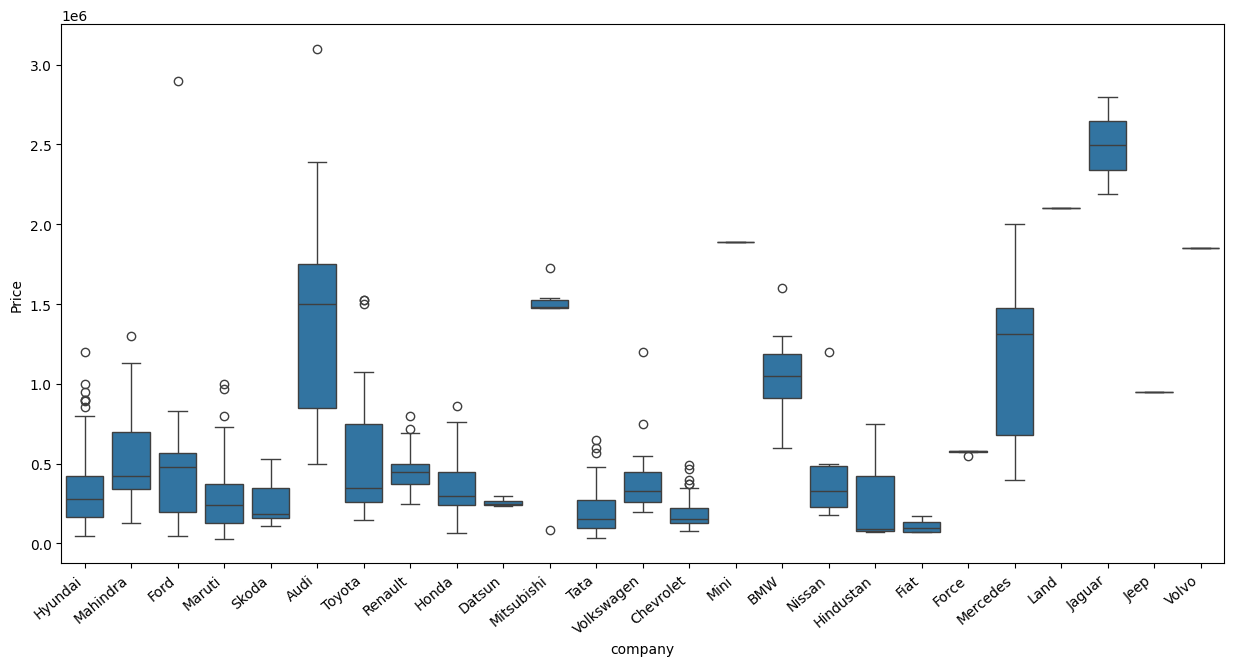

In [33]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()
#the distribution of Price values for each company,
# showing the median, quartiles, and any outliers

Checking relationship of Year with Price

c:\Users\J Chaitanya Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\J Chaitanya Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\J Chaitanya Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\J Chaitanya Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the marke

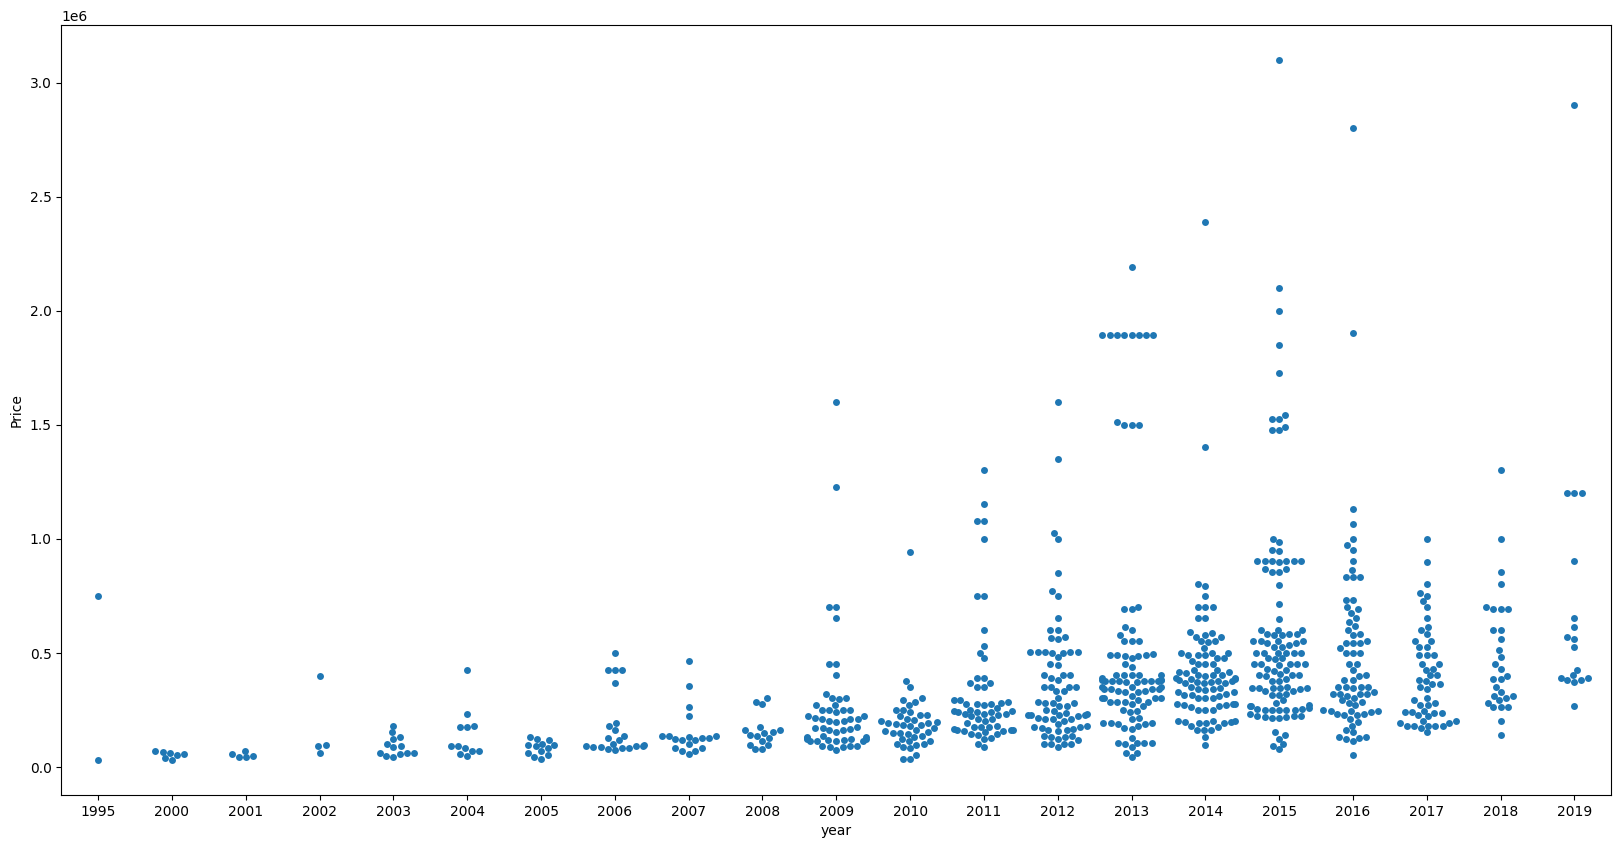

In [34]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=data)

<Axes: xlabel='fuel_type', ylabel='Price'>

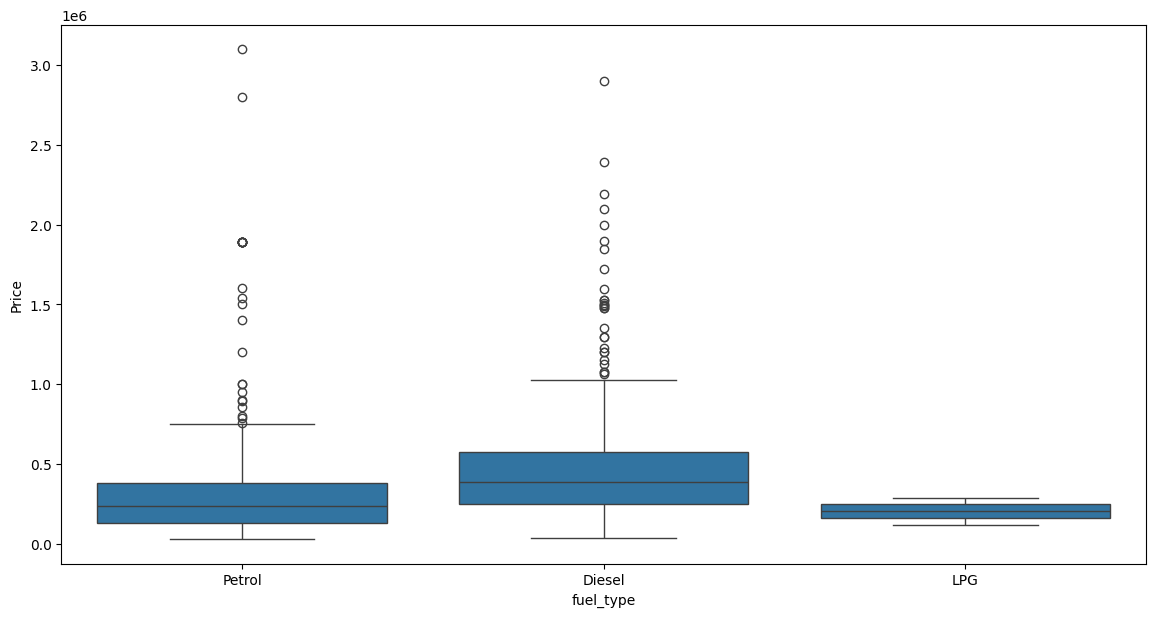

In [33]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=data)

In [36]:
data.to_csv('Cleaned Car.csv')

# Model

In [34]:
X = data.drop(columns='Price') #all columns excluding Price
y = data['Price']

In [35]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,132000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


In [37]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
810    270000
811    110000
812    300000
813    260000
814    390000
Name: Price, Length: 815, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [39]:
ohe = OneHotEncoder()
ohe.fit(X[['name', 'company','fuel_type']])

OneHotEncoder()

In [40]:
#Creating a column transformer to transform categorical columns
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')
#passthrough is to consider only categorical values and skip other values

In [41]:
lr = LinearRegression()

In [42]:
pipe=make_pipeline(column_trans,lr)

In [43]:
pipe.fit(X_train,y_train)

c:\Users\J Chaitanya Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [44]:
y_pred=pipe.predict(X_test)

In [45]:
r2_score(y_test,y_pred)

0.6557481671823622

In [46]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

The best model is found at random state 302

In [47]:
np.argmax(scores)

np.int64(302)

In [48]:
scores[np.argmax(scores)]

0.8991157554877304

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8991157554877304

In [1]:
import pickle